**MNIST dataset downloaded from kaggle**

In [0]:
#install dependencies
!pip install kaggle

In [0]:
#upload the credentials of the kaggle account
from google.colab import files
files.upload()

In [0]:
#kaggle API client expects this file to be in ~/.kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#this permissions change avoids a warning on kaggle tool startup 
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#import the dataset we want to use for project.
!kaggle competitions download -c digit-recognizer

 86% 63.0M/73.2M [00:00<00:00, 129MB/s]
100% 73.2M/73.2M [00:00<00:00, 208MB/s]
 92% 45.0M/48.8M [00:00<00:00, 189MB/s]
100% 48.8M/48.8M [00:00<00:00, 193MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 61.3MB/s]


In [0]:
#imported files from kaggle 
!ls

kaggle.json  sample_data  sample_submission.csv  test.csv  train.csv


In [0]:
import pandas as pd

df= pd.read_csv('train.csv')
print(df.head())

l=df['label']
d=df.drop('label',axis=1)

   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


In [0]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


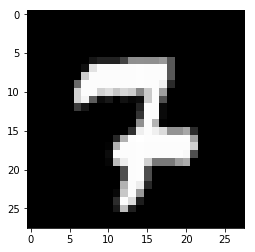

7


In [0]:
#plotting of single number
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
idx=678
grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,cmap='gray')
plt.show()
print(l[idx])

**2D Visualization using PCA**

In [0]:
labels=l.head(42000) #gives 42k rows
data=d.head(42000)
print('Shape of train dataset:',data.shape)

Shape of train dataset: (42000, 784)


In [0]:
#data_preprocessing

from sklearn import preprocessing
scaler=preprocessing.StandardScaler().fit_transform(data)
print(scaler.shape)

(42000, 784)


In [0]:
sample_data = scaler

covar_matrix = np.matmul(sample_data.T , sample_data)  #covariance matrix

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (784, 784)


In [0]:
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(782,783))  #top 2 eigen vectors
print('Shape of eigen vectors:',vectors.shape)
vectors=vectors.T
print('Updated shape of eigen vectors:',z.shape)

Shape of eigen vectors: (784, 2)
Updated shape of eigen vectors: (2, 784)


In [77]:
newpoints=np.matmul(vectors,sample_data.T)
print("New datapoints shape:",vectors.shape, "X", sample_data.shape,":" ,newpoints.shape)
print('')
newpoints=np.vstack((newpoints,labels)).T
data_frame=pd.DataFrame(data=newpoints,columns=("1st principal","2nd principal","label"))
print(data_frame)

New datapoints shape: (2, 784) X (42000, 784) : (2, 42000)

       1st principal  2nd principal  label
0          -5.226445      -5.140478    1.0
1           6.032996      19.292332    0.0
2          -1.705813      -7.644503    1.0
3           5.836139      -0.474207    4.0
4           6.024818      26.559574    0.0
5          -0.713788       1.269197    0.0
6           6.028416      -6.139613    7.0
7           4.238571       0.147792    3.0
8          -1.671837      -0.598138    5.0
9          -2.182601       2.940684    3.0
10         -5.800594       0.530970    8.0
11         -2.840313      -5.089862    9.0
12         -1.789000      -8.135130    1.0
13         14.066481       0.943464    3.0
14          0.764763       6.205129    3.0
15         -1.042898      -8.023728    1.0
16          6.019213       0.440178    2.0
17        -10.119340       8.393430    0.0
18          1.371945      -6.819947    7.0
19          5.757946      11.687632    5.0
20         -5.424841      -3.688248  

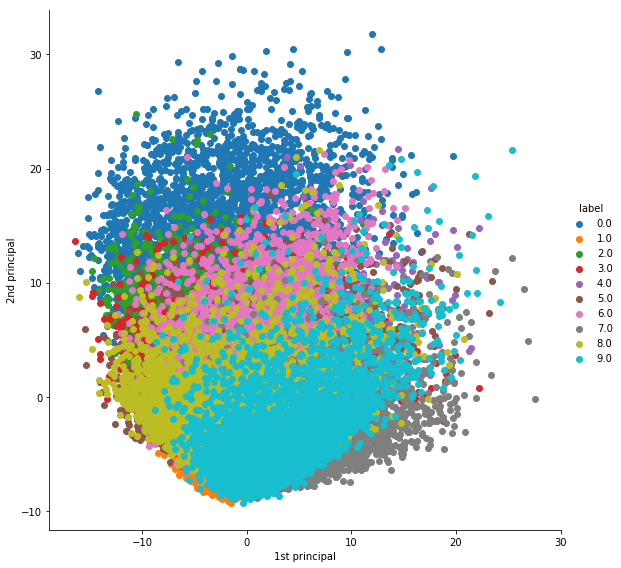

In [0]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.FacetGrid(data=data_frame,hue="label",height=8).map(plt.scatter,"1st principal","2nd principal").add_legend()
plt.show()

**PCA using Scikit-Learn**

In [71]:
#initializing pca
from sklearn import decomposition

pca=decomposition.PCA()
pca.n_components=2

#sklearn.decomposition.PCA(n_components=42000)
pcadata=pca.fit_transform(sample_data)   #covariance matrix,eigen values & eigen vectors and multiplying top 2 eigen vectors all are taken under fit_transform
print("2-D projects of data:",pcadata.shape)

2-D projects of data: (42000, 2)


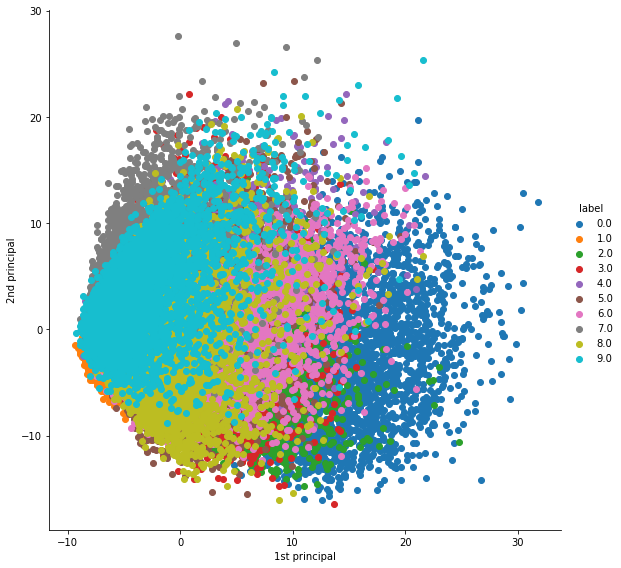

In [72]:
pcadata=np.vstack((pcadata.T,labels)).T
pcadf=pd.DataFrame(data=pcadata,columns=("1st principal","2nd principal","label"))
sn.FacetGrid(pcadf,hue='label',height=8).map(plt.scatter,"1st principal","2nd principal").add_legend()
plt.show()

**PCA (not for visualization)**

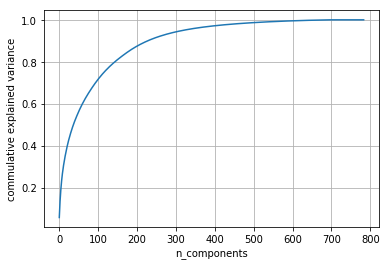

In [76]:
pca.n_components=784
pcadata=pca.fit_transform(sample_data)

perc_var_explain=pca.explained_variance_/np.sum(pca.explained_variance_)

cummulative_var_explain=np.cumsum(perc_var_explain)
plt.plot(cummulative_var_explain)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('commulative explained variance')
plt.show()

#So if we want to make ML model of MNIST dataset, we should convert our dataset from 784 to 200 dimensions to preserve aprroximately 90% of the variance of projected points.